Read and visualize raster data

In [2]:
import pystac
import rioxarray


In [3]:
#load previously searched (and saved) Sentinel-2 images
items = pystac.ItemCollection.from_file("search.json")

#open the first item (band 9 in Amsterdam)
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href)

In [4]:
# view the shape and attributes of the data
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [5]:
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.bounds()) #method
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

EPSG:32631
0
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


Visualize a Raster

In [6]:
# examine the array
raster_ams_b9.values

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

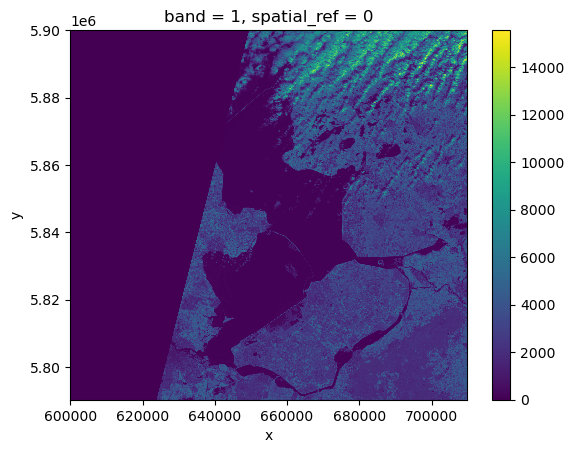

In [7]:
# show a basic plot
raster_ams_b9.plot()

The nir09 band with the central wavelength of 945nm is sensitive to water vapor
https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/msi-instrument

Note: band=1 in the image title refers to the ordering of all the bands in the DataArray, not the Sentinel-2 band number 09 that we saw in the pystac search results.

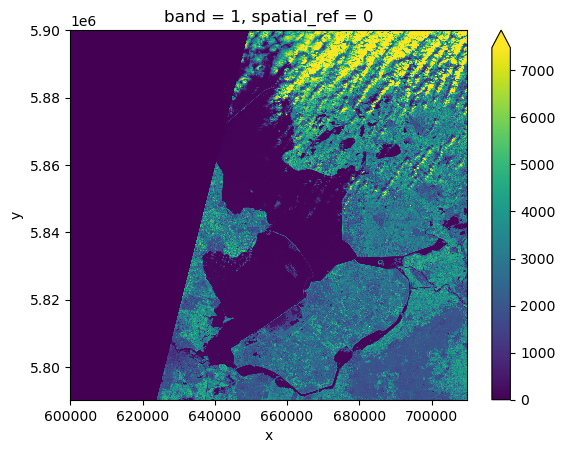

In [8]:
# cloudy pixels at the top of the image have high reflectance values, while the contrast of everything else is quite low.
# use robust=True, which displays values between the 2nd and 98th percentile
raster_ams_b9.plot(robust=True)

# or manually set range raster_ams_b9.plot(vmin=100, vmax=7000)

In [9]:
# View the Raster Coordinate Reference System
print(raster_ams_b9.rio.crs)

EPSG:32631


In [10]:
# or the EPSG code number as an int
raster_ams_b9.rio.crs.to_epsg()

32631

In [11]:
# Use pyproj to see more metadata about the CRS
from pyproj import CRS
epsg = raster_ams_b9.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
#  show the geographic bounds that the CRS is intended to be used
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

In [13]:
help(crs)

Help on CRS in module pyproj.crs.crs object:

class CRS(builtins.object)
 |  CRS(projparams: Optional[Any] = None, **kwargs) -> None
 |  
 |  A pythonic Coordinate Reference System manager.
 |  
 |  .. versionadded:: 2.0.0
 |  
 |  See: :c:func:`proj_create`
 |  
 |  The functionality is based on other fantastic projects:
 |  
 |  * `rasterio <https://github.com/mapbox/rasterio/blob/c13f0943b95c0eaa36ff3f620bd91107aa67b381/rasterio/_crs.pyx>`_  # noqa: E501
 |  * `opendatacube <https://github.com/opendatacube/datacube-core/blob/83bae20d2a2469a6417097168fd4ede37fd2abe5/datacube/utils/geometry/_base.py>`_  # noqa: E501
 |  
 |  Attributes
 |  ----------
 |  srs: str
 |      The string form of the user input used to create the CRS.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other: Any) -> bool
 |      Return self==value.
 |  
 |  __getstate__(self) -> dict[str, str]
 |  
 |  __hash__(self) -> int
 |      Return hash(self).
 |  
 |  __init__(self, projparams: Optional[Any] = None

In [14]:
dir(crs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

In [15]:
# units are our data in
print(crs.axis_info)
print(raster_ams_b9.rio.crs.linear_units)

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre), Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]
metre


Calculate Raster Statistics

In [16]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15558, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(1649.83763385)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2053.77598092)
Coordinates:
    spatial_ref  int64 0


In [17]:
# Does not work
#print(raster_ams_b9.describe())

AttributeError: 'DataArray' object has no attribute 'describe'

In [18]:
#  to see specific quantiles
print(raster_ams_b9.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)>
array([   0., 2919.])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


In [19]:
# do above with numpy
import numpy
print(numpy.percentile(raster_ams_b9, 25))
print(numpy.percentile(raster_ams_b9, 75))

0.0
2919.0


In [20]:
# to see the default dimention
help(raster_ams_b9.quantile)

Help on method quantile in module xarray.core.dataarray:

quantile(q: 'ArrayLike', dim: 'Dims' = None, *, method: 'QuantileMethods' = 'linear', keep_attrs: 'bool | None' = None, skipna: 'bool | None' = None, interpolation: 'QuantileMethods | None' = None) -> 'Self' method of xarray.core.dataarray.DataArray instance
    Compute the qth quantile of the data along the specified dimension.
    
    Returns the qth quantiles(s) of the array elements.
    
    Parameters
    ----------
    q : float or array-like of float
        Quantile to compute, which must be between 0 and 1 inclusive.
    dim : str or Iterable of Hashable, optional
        Dimension(s) over which to apply quantile.
    method : str, default: "linear"
        This optional parameter specifies the interpolation method to use when the
        desired quantile lies between two data points. The options sorted by their R
        type as summarized in the H&F paper [1]_ are:
    
            1. "inverted_cdf"
            2. "

Dealing with Missing Data

In [21]:
# masking missing data
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

# or using where raster_ams_b9.where(raster_ams_b9!=raster_ams_b9.rio.nodata)

#note this changes the data type of DataArray from integers to float

In [22]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())

<xarray.DataArray ()>
array(1., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15558., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2475.8188, dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2069.959, dtype=float32)
Coordinates:
    spatial_ref  int64 0


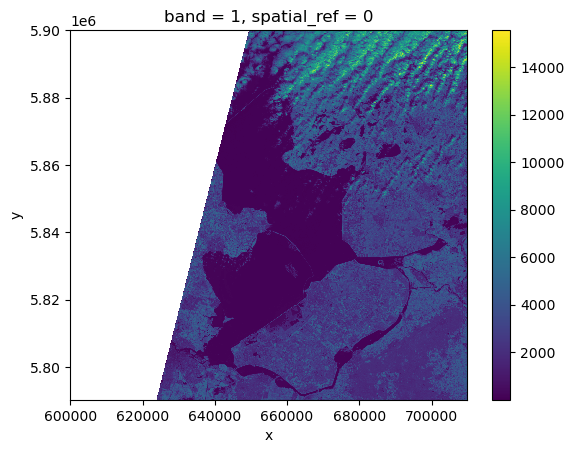

In [23]:
# nodata pixels are not shown because they are not 0 anymore
raster_ams_b9.plot()

Raster Bands

In [24]:
#load overview asset for the Sentinel-2 scene
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=3)
raster_ams_overview

<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.001e+05 6.002e+05 ... 7.096e+05 7.097e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [25]:
# check the shape
raster_ams_overview.shape

(3, 687, 687)

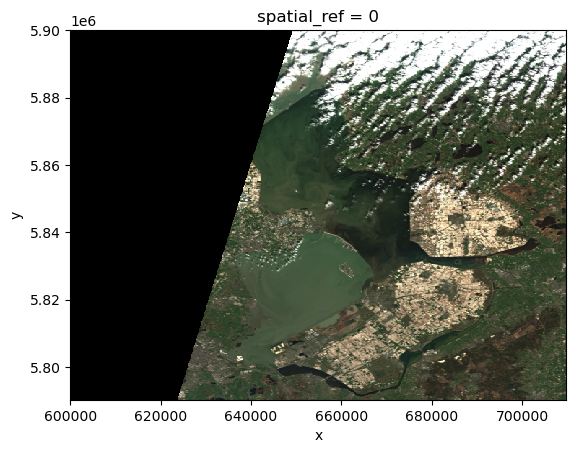

In [26]:
# visualize the multi-band data
raster_ams_overview.plot.imshow()

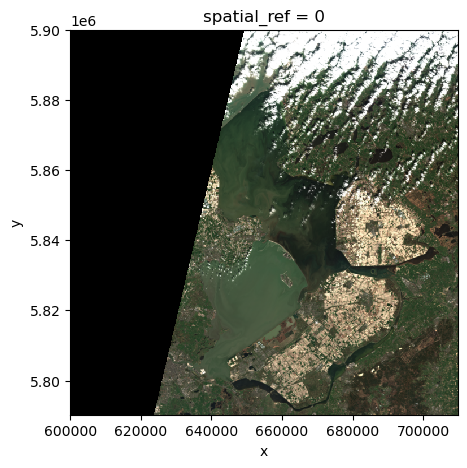

In [27]:
# fix the aspect ratio
raster_ams_overview.plot.imshow(size=5, aspect=1)

#note: height/width ratio is 1:1 (check the rio.height and rio.width) and size required with aspect